Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?

a. Построить точечный график

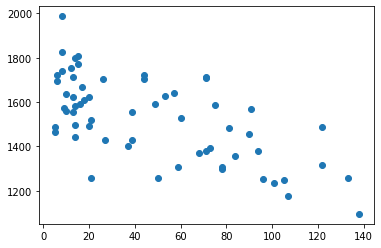

In [3]:
plt.scatter(df['hardness'], df['mortality'])

b. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [4]:
df[['hardness', 'mortality']].corr() #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
df[['hardness', 'mortality']].corr(method='spearman')  #коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Между уровнем жесткости воды и смертностью существует обратная зависимость.

c. Построить модель линейной регрессии

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = df[['hardness']].values
Y = df['mortality'].values

In [8]:
X.shape

(61, 1)

In [9]:
Y.shape

(61,)

In [10]:
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.4288267193124974

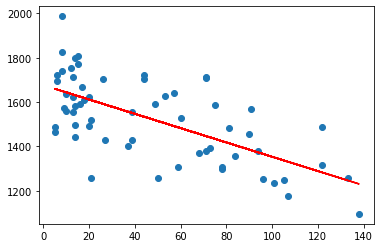

In [11]:
plt.scatter(df['hardness'], df['mortality'])
plt.plot(df['hardness'], model.predict(df[['hardness']]), c='r')

d. Рассчитать коэффициент детерминации

In [12]:
model.coef_

array([-3.22609161])

e. Вывести график остатков

In [13]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [14]:
X = df[['mortality']].values
Y = df['hardness'].values

X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Fri, 25 Sep 2020   Prob (F-statistic):           1.03e-08
Time:                        19:05:47   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

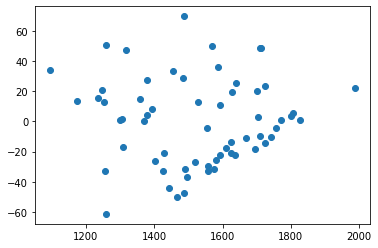

In [15]:
plt.scatter(X[:, 1], results.resid)

(array([ 2.,  3., 11., 10.,  9.,  9.,  8.,  3.,  5.,  1.]),
 array([-61.29201633, -48.18792189, -35.08382745, -21.97973301,
         -8.87563857,   4.22845587,  17.33255031,  30.43664475,
         43.54073919,  56.64483363,  69.74892807]),
 <a list of 10 Patch objects>)

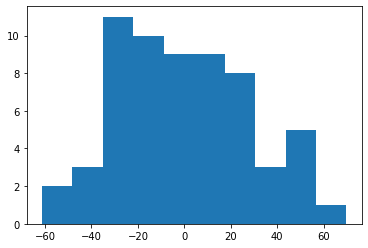

In [16]:
plt.hist(results.resid)

2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?

a. Разделить данные на 2 группы

Север:

In [17]:
df_N = df.loc[df['location'] == 'North']
df_N.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [18]:
df_S = df.loc[df['location'] == 'South']
df_S.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

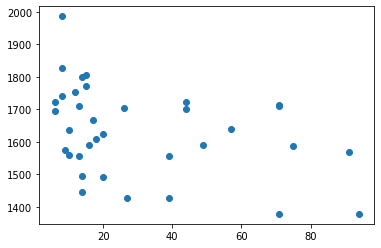

In [19]:
plt.scatter(df_N['hardness'], df_N['mortality'])

In [20]:
df_N[['hardness', 'mortality']].corr()  #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [21]:
df_N[['hardness', 'mortality']].corr(method='spearman')  #коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [22]:
X_N = df_N[['hardness']].values
Y_N = df_N['mortality'].values
model_N = LinearRegression()
model_N.fit(X_N, Y_N)
model_N.score(X_N, Y_N)

0.1358643664207173

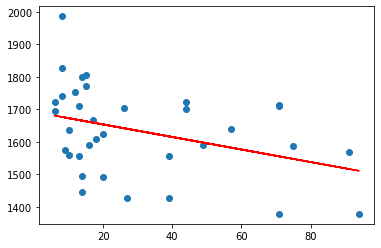

In [23]:
plt.scatter(df_N['hardness'], df_N['mortality'])
plt.plot(df_N['hardness'], model_N.predict(df_N[['hardness']]), c='r')

In [24]:
model_N.coef_

array([-1.93134215])

In [25]:
X_N = df_N[['mortality']].values
Y_N = df_N['hardness'].values

X_N = sm.add_constant(X_N)

model = sm.OLS(Y_N, X_N)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Fri, 25 Sep 2020   Prob (F-statistic):             0.0293
Time:                        19:06:03   Log-Likelihood:                -160.81
No. Observations:                  35   AIC:                             325.6
Df Residuals:                      33   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.3191     50.623      2.871      0.0

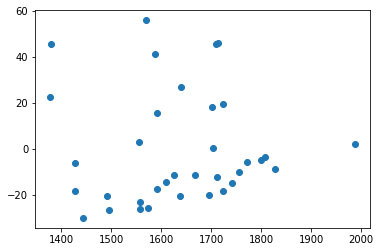

In [26]:
plt.scatter(X_N[:, 1], results.resid)

(array([5., 8., 8., 4., 0., 3., 2., 0., 4., 1.]),
 array([-29.73781476, -21.15847571, -12.57913666,  -3.9997976 ,
          4.57954145,  13.1588805 ,  21.73821956,  30.31755861,
         38.89689766,  47.47623672,  56.05557577]),
 <a list of 10 Patch objects>)

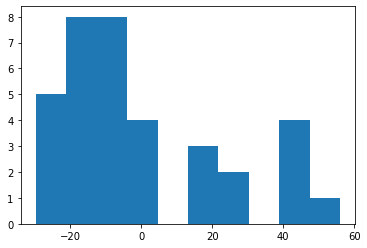

In [27]:
plt.hist(results.resid)

Юг:

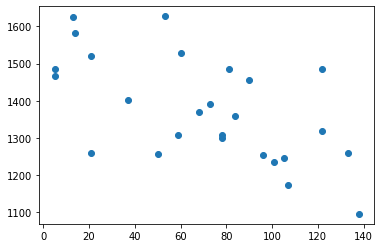

In [28]:
plt.scatter(df_S['hardness'], df_S['mortality'])

In [29]:
df_S[['hardness', 'mortality']].corr()  #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [30]:
df_S[['hardness', 'mortality']].corr(method='spearman')  #коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [31]:
X_S = df_S[['hardness']].values
Y_S = df_S['mortality'].values
model_S = LinearRegression()
model_S.fit(X_S, Y_S)
model_S.score(X_S, Y_S)

0.3625885624364601

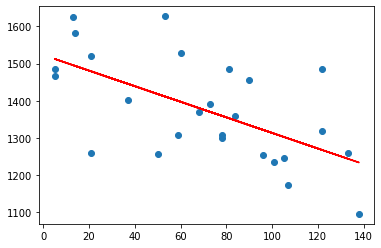

In [32]:
plt.scatter(df_S['hardness'], df_S['mortality'])
plt.plot(df_S['hardness'], model_S.predict(df_S[['hardness']]), c='r')

In [33]:
model_S.coef_

array([-2.09271845])

In [34]:
X_S = df_S[['mortality']].values
Y_S = df_S['hardness'].values

X_S = sm.add_constant(X_S)

model = sm.OLS(Y_S, X_S)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Fri, 25 Sep 2020   Prob (F-statistic):            0.00113
Time:                        19:06:13   Log-Likelihood:                -126.67
No. Observations:                  26   AIC:                             257.3
Df Residuals:                      24   BIC:                             259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.3177     64.883      4.752      0.0

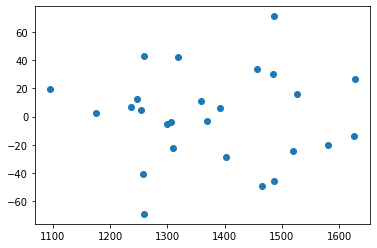

In [35]:
plt.scatter(X_S[:, 1], results.resid)

(array([1., 2., 2., 4., 3., 6., 3., 4., 0., 1.]),
 array([-69.00756398, -54.99184301, -40.97612203, -26.96040106,
        -12.94468009,   1.07104088,  15.08676186,  29.10248283,
         43.1182038 ,  57.13392477,  71.14964575]),
 <a list of 10 Patch objects>)

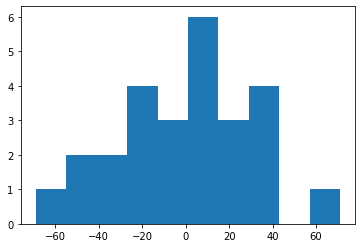

In [36]:
plt.hist(results.resid)

По результатам разделения датасета, значительных различий нет, зависимость в обоих случаях обратная. В южных штатах более выраженная корреляция.